## Homework 5: Mixed-effects models

In this homework we will continue analyzing the lexical decision data from Homework 4. 

We will be using the files `ldt_trials.csv` and `word_properties.csv` in the `data` folder. These files contain lexical decision reaction times for each participant and each word (`ldt_trials.csv`) and information about various word properties such as word length, word frequency, concreteness and emotional valence (`word_properties.csv`). These data were obtained from the English Lexicon Project: https://elexicon.wustl.edu/index.html

#### Part 1: Loading and organizing the data

Load the two datasets and repeat all preprocessing steps from Homework 4. You should end up with a dataset of 35978 rows.

In [1]:
library(tidyverse)

ldt_trials <- read.csv('ldt_trials.csv')
word_properties <- read.csv('word_properties.csv')

df1 <- left_join(ldt_trials, word_properties, by=c("D_word"="Word"))  %>% 
    filter(!is.na(Length))

head(df1)
nrow(df1)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,85,85,1,1,541,healthy,0,-0.849372,7,24.75,3.31,7.76
2,85,86,1,1,1215,loony,0,1.535949,5,2.41,2.15,4.48
3,85,89,1,1,677,cart,0,-0.368061,4,9.04,4.89,5.37
4,85,100,1,1,659,blunt,0,-0.431764,5,4.90,3.07,4.65
5,85,101,1,1,532,thousand,0,-0.881224,8,69.29,3.08,6.44
6,85,111,1,1,597,lyrics,0,-0.651186,6,5.08,3.86,6.42


[1] 35978

Transform the Sub_ID variable into a factor using the `as.factor()` command:

In [2]:
df1$Sub_ID <-as.factor(df1$Sub_ID)
str(df1)


'data.frame':	35978 obs. of  12 variables:
 $ Sub_ID             : Factor w/ 99 levels "1","2","3","4",..: 84 84 84 84 84 84 84 84 84 84 ...
 $ Trial              : int  85 86 89 100 101 111 119 121 124 126 ...
 $ Type               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ D_Accuracy         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ D_RT               : int  541 1215 677 659 532 597 611 886 483 473 ...
 $ D_word             : Factor w/ 80962 levels "a","aah","aal",..: 33191 43038 10135 7368 72737 43680 54614 30679 54079 2023 ...
 $ Outlier            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ D_Zscore           : num  -0.849 1.536 -0.368 -0.432 -0.881 ...
 $ Length             : int  7 5 4 5 8 6 7 7 5 5 ...
 $ SUBTLWF            : num  24.75 2.41 9.04 4.9 69.29 ...
 $ Concreteness_Rating: num  3.31 2.15 4.89 3.07 3.08 3.86 4.48 4.93 4.67 2.41 ...
 $ Emotional_Valence  : num  7.76 4.48 5.37 4.65 6.44 6.42 4.65 6.21 6 6.39 ...


#### Part 2: Plot the effect of Length on RTs separately for each participant

In Homework 4 we saw that lexical decision RTs increase as a function of word length by approximately 26 ms per letter. This is the overall effect, but it's likely that the effect varies across participants. First, let's try to do some plots to understand this better.

First, plot the overall effect of word length on RTs. Use the `stat_summary()` command to summarize the Y variable for each X value. Then use the `geom_smooth(method='lm', se=F)` command to plot a linear regression line through the data.

No summary function supplied, defaulting to `mean_se()`

`geom_smooth()` using formula 'y ~ x'



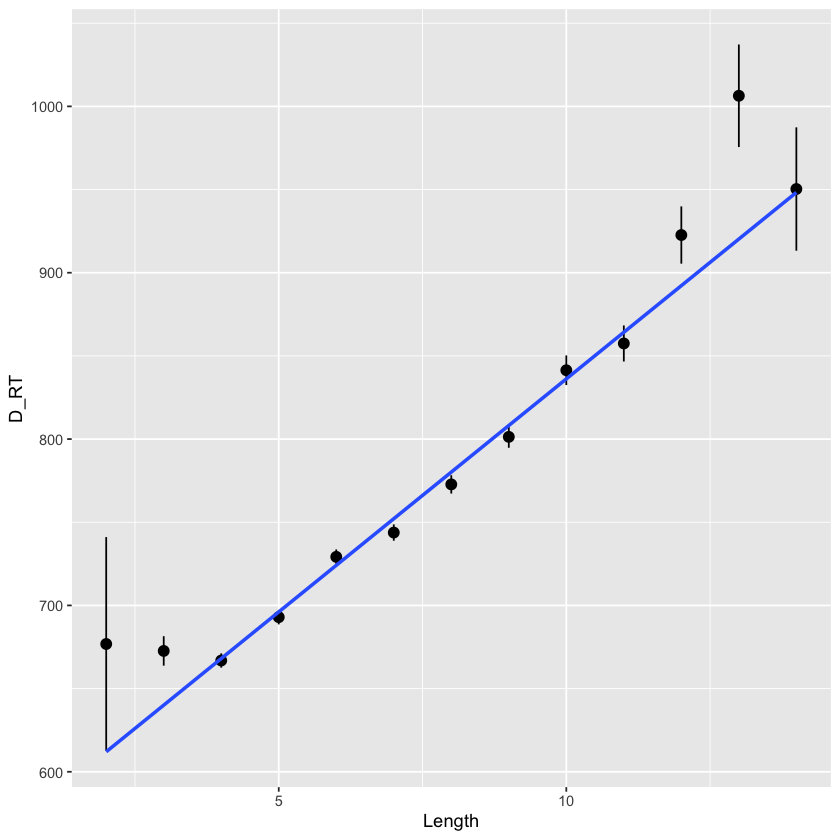

In [3]:
ggplot(df1, aes(x= Length, y= D_RT)) + stat_summary() + geom_smooth(method='lm', se=F)

Now, let's see how much this effect varies across participants. Make the same plot, but this time in the `aes()` function add the argument `color=Sub_ID`. This will create separate regression lines in different colors for each participant.

No summary function supplied, defaulting to `mean_se()`

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 71 rows containing missing values (geom_segment).”


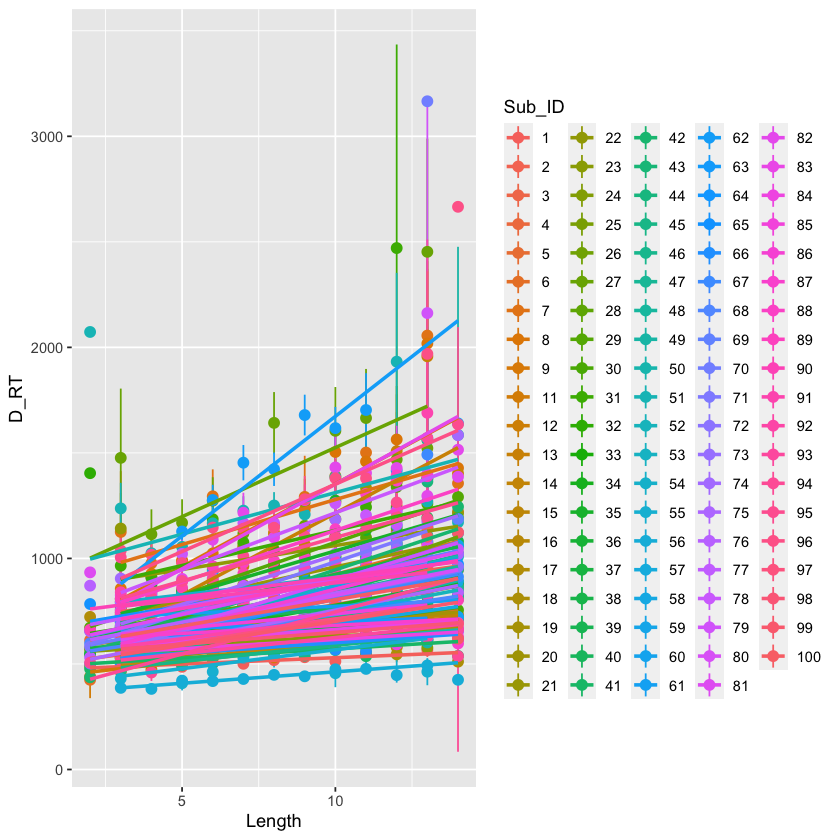

In [4]:
ggplot(df1, aes(x= Length, y= D_RT, color=Sub_ID )) + stat_summary() + geom_smooth(method='lm', se=F)

Describe briefly the plot above. What stands out to you?

I'm asking my self why I see the regressions lines for 100 participants, in the structure of the data 99 levels in Sub_ID are visible, so 99 participants.
Furthermore, it stands out to me, that some of the regression lines show a different pattern than the bigger part, diffrent slope and different intercept.

The plot above has too manyt subjects so it's a bit difficult to see them well. Just for the exercize, let's do the same plot but for a smaller subset of subjects. Filter the data so that you keep only data for subjects 8,13,50,56,62,78,82 and repeat the plot above with this filtered dataset. Which of these subjects has the lowest intercept? Which one seems to have the steepest slope?

subject 62 hast the steepest slope


Warning message in `==.default`(Sub_ID, c("8", "13", "50", "56", "62", "78", "82")):
“Länge des längeren Objektes
 	 ist kein Vielfaches der Länge des kürzeren Objektes”
Warning message in is.na(e1) | is.na(e2):
“Länge des längeren Objektes
 	 ist kein Vielfaches der Länge des kürzeren Objektes”


'data.frame':	367 obs. of  12 variables:
 $ Sub_ID             : Factor w/ 99 levels "1","2","3","4",..: 81 81 81 81 81 81 81 81 81 81 ...
 $ Trial              : int  3231 3269 3322 1940 1986 2099 2171 2241 2300 2355 ...
 $ Type               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ D_Accuracy         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ D_RT               : int  1347 3123 913 963 666 800 715 836 1404 832 ...
 $ D_word             : Factor w/ 80962 levels "a","aah","aal",..: 14286 37827 74705 78710 54906 45203 5903 78515 68248 48427 ...
 $ Outlier            : int  0 1 0 0 0 0 0 0 0 0 ...
 $ D_Zscore           : num  0.38 4.401 -0.602 -0.489 -1.161 ...
 $ Length             : int  8 6 8 5 4 6 4 8 10 8 ...
 $ SUBTLWF            : num  1.29 3.16 1.02 10.1 1.88 ...
 $ Concreteness_Rating: num  2.85 4.89 2.72 4.97 4.46 2.38 4.72 3.07 3.09 2.97 ...
 $ Emotional_Valence  : num  5.37 4.43 5.85 5.68 5.09 6.58 5.14 2.71 7.64 6.14 ...


No summary function supplied, defaulting to `mean_se()`

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing missing values (geom_segment).”


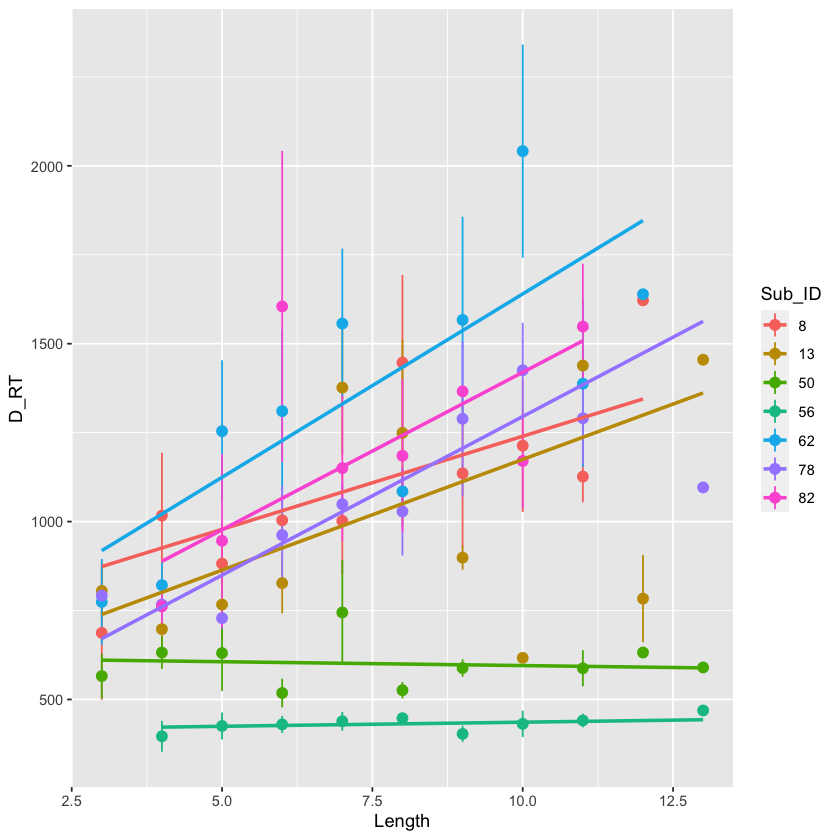

In [5]:
subset <- subset(df1,Sub_ID == c('8','13','50','56','62','78','82'))
subset$Sub_ID <-as.factor(subset$Sub_ID)
str(subset)

ggplot(subset, aes(x= Length, y= D_RT, color=Sub_ID)) + stat_summary() + geom_smooth(method='lm', se=F)


#### Part 3: Fit separate linear regression to each subject

Before we fit a mixed-effects model, let's pretend that each subject is it's own experiment and let's fit a separate linear regression for each subject. We will then extract the intercepts and slopes for each participant's regression, and plot their distribution. The next few cells will take you step by step through this process

Create a new variable called `sub_ids` that contains the unique values of Sub_ID. This variable should have 99 unique values (you can use the `unique()` command):

In [6]:
sub_ids <- unique(df1$Sub_ID)
str(sub_ids)

 Factor w/ 99 levels "1","2","3","4",..: 84 20 28 50 82 85 63 56 47 42 ...


Now we need to create a `for` loop that will fit a regression separately for each participant. We can do that step by step. Please read https://www.datacamp.com/community/tutorials/tutorial-on-loops-in-r if you are not familiar with how `for` loops work. We will create the following basic algorithm:

1. Create an empty variable to store the intercepts for each subject
2. Create an empty variable to store the slopes for each subject
3. [Loop] - for each value of sub_ids:
    - Extract the data for that subject and assign it to a temporary variable
    - Fit a regression model to the extracted data and assign the output to a temporary variable
    - Extract the intercept from the model variable, and append it to the empty intercept variable we created before
    - Extract the slope from the model variable and append it to the empty slope variable we created before

Since this is a fairly advanced use of R programming, the basic code for this is provided below, but you need to fill out some missing details:
- You will need to replace the `df1` variable with the name of your main data.frame that contains data for all subjects
- In the line `sub_ml <- ` add a linear regression of D_RT as a function of Length. Use the `sub_data` in the linear regression call as an argument for `data = `


Then run the cell below:

In [7]:
sub_intercepts <- c() # create an empty variable to store the intercepts for each subject
sub_slopes <- c() # create an empty variable to store the slopes for each subject

# loop over sub_id values
for (subject in sub_ids) {
    sub_data <- filter(df1, Sub_ID == subject)  # extract data for the subject in each loop step
    sub_ml <- lm(D_RT ~ Length, data=sub_data)  # run a regression for each subjects data
    intercept <- coef(sub_ml)[1] # extract the intercept for the subject in each loop step
    slope <- coef(sub_ml)[2] # extract the slope for the subject in each loop step
    sub_intercepts <- c(sub_intercepts, intercept) # append the intercept of this subject to the vector of intercepts for each subject
    sub_slopes <- c(sub_slopes, slope) # append the intercept of this subject to the vector of intercepts for each subject
}

Now, both `sub_intercepts` and `sub_slopes` should be vectors with 99 values each. Show their contents in the cell below:

In [8]:
str(sub_intercepts)
str(sub_slopes)

head(sub_intercepts)
head(sub_slopes)

 Named num [1:99] 599 644 577 918 552 ...
 - attr(*, "names")= chr [1:99] "(Intercept)" "(Intercept)" "(Intercept)" "(Intercept)" ...
 Named num [1:99] 13.9 31.6 49.9 39.4 11.2 ...
 - attr(*, "names")= chr [1:99] "Length" "Length" "Length" "Length" ...


(Intercept) (Intercept) (Intercept) (Intercept) (Intercept) (Intercept) 
   598.5258    644.0770    576.8080    917.9777    551.6018    484.7978

Length   Length   Length   Length   Length   Length 
13.94178 31.57792 49.90941 39.38450 11.19161 36.93778

Let's combine `sub_ids`, `sub_intercepts` and `sub_slopes` in a new data.frame with 3 columns named `id`, `intercept` and `slope` that correspond to each of these variables. The data.frame should have 99 rows, one row for each subject. Assign the result to a new variable called `sub_lm_coefs` and show it's contents:

In [9]:
sub_lm_coefs = data.frame('id' = sub_ids, 'intercept' = sub_intercepts, 'slope'= sub_slopes)
head(sub_lm_coefs)

,id,intercept,slope
,<fct>,<dbl>,<dbl>
1,85,598.5258,13.94178
2,21,644.0770,31.57792
3,29,576.8080,49.90941
4,51,917.9777,39.38450
5,83,551.6018,11.19161
6,86,484.7978,36.93778


Use the `arrange()` command from the `tidyverse` package to sort the data frame first by the intercept and then by the slope. Answer the following questions:
- which subject has the slowest and which has the fastest intercept?
- which subject has the steepest and the least steep slope? Explain their slope values in terms of how word length affects RTs
- are there any subject for which Length affects RTs negatively?

In [10]:
by_intercept <- arrange(sub_lm_coefs, intercept); by_intercept
by_slope <- arrange(sub_lm_coefs, slope); by_slope

# The subject with the ID 51 has te slowest intercept and subject with the ID 94 has the fastest intercept

# The subject with the ID 1 has the least steep slope, what means that if a word increses by one letter, the reaction time increases by the lowest value from all the subjects in this data.
# The subject with the ID 62 has the steepest slope, so for each additional letter this subject has the largest increase in reaction time.



id,intercept,slope
<fct>,<dbl>,<dbl>
94,347.7834,39.886670
56,354.3454,10.827716
55,388.4301,17.882297
26,390.4092,50.847820
49,420.9655,33.847135
11,428.7327,16.406302
45,435.8119,15.198436
4,438.4972,20.432028
13,438.5252,77.602536


id,intercept,slope
<fct>,<dbl>,<dbl>
1,469.1171,6.055492
63,635.0193,6.290070
61,703.2857,7.015212
72,585.4562,7.498995
87,607.0846,7.577499
24,515.9155,8.032788
41,484.1498,8.717047
84,528.5795,8.740112
23,542.5200,8.839516


In [11]:
sub_lm_coefs$slope < 0


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[97] FALSE FALSE FALSE

No there is no subject, for which Length affects RTs negatively.

Make 3 plots:
- A histogram of the intercepts for each participant
- A histogram of the slopess for each participant
- A scatterplot of the relationship between intercepts and slopes for each participant

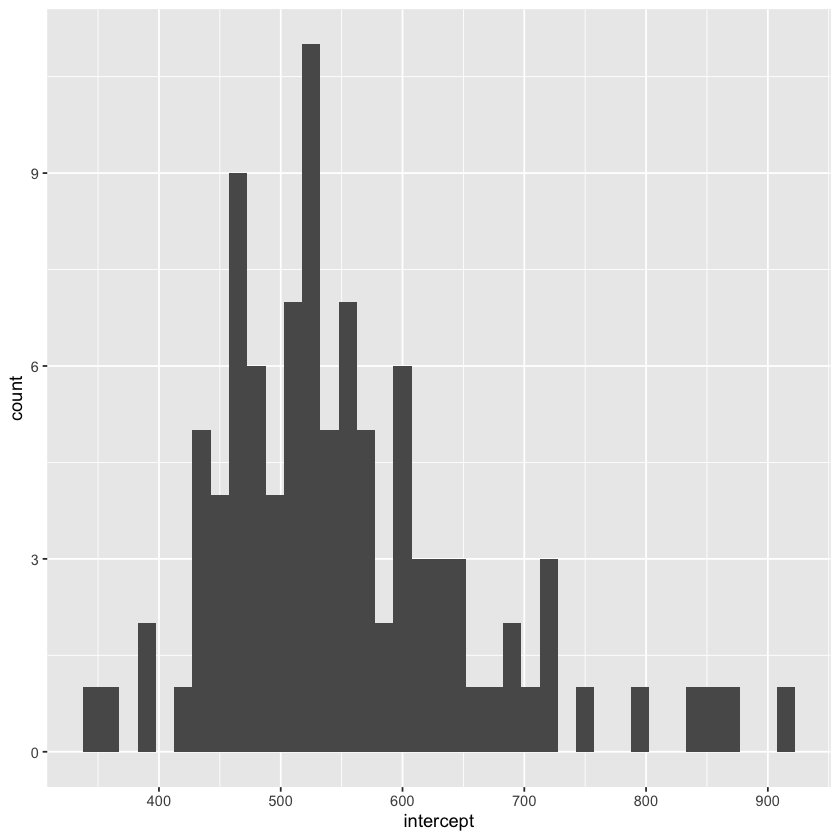

`geom_smooth()` using formula 'y ~ x'



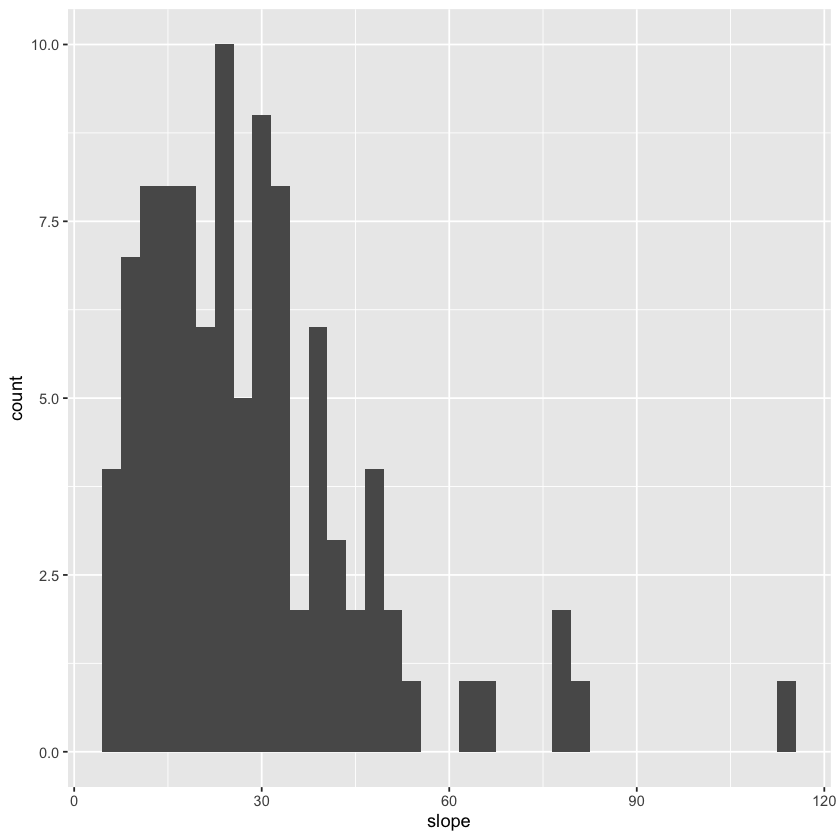

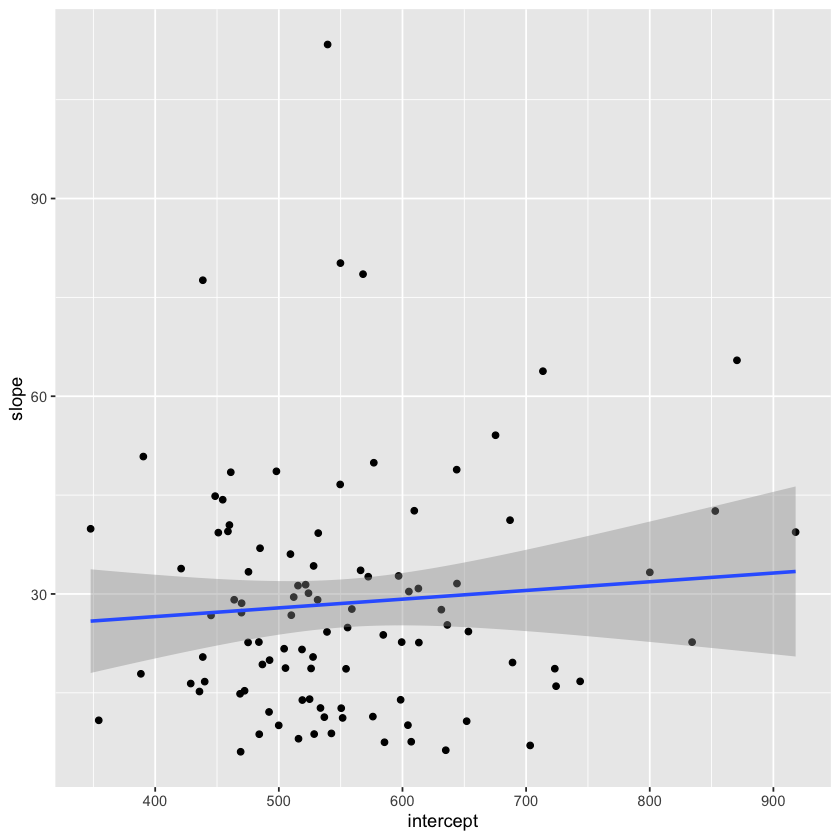

In [12]:
ggplot(data= sub_lm_coefs, aes(intercept)) + geom_histogram(binwidth = 15) 
ggplot(data= sub_lm_coefs, aes(slope)) + geom_histogram(binwidth = 3)
ggplot(data= sub_lm_coefs, aes(x=intercept, y=slope)) + geom_point() + geom_smooth(method=lm)




Are the intercepts and slopes normally distributed across subjects?

The intercept shows similarity to a normal distribution.
The slope do not show a normal distribution.

Are the intercept and slope for each subject correlated? That is, if the subject is overall slower in the task, are they more strongly affected by the word length property?

In [13]:
cor(sub_lm_coefs$intercept, sub_lm_coefs$slope)

[1] 0.07822247

There is a very weak correaltion between intercept and slope. So if a subject is overall slower does not mean that it is more affected by word length.

What is the mean intercept and slope over all participants?

In [14]:
mean(sub_lm_coefs$intercept)
mean(sub_lm_coefs$slope)

[1] 553.263

[1] 28.5922

#### Part 4: Fit a mixed-effects regression to the data

We just fit a separate regression model to the data from each participant, ignoring the data from other participants. This accounts for individual differences, but it has several drawbacks:
- it is not easy to test directly whether overall the effect of word length has an effect of RTs. The fact that all subjects showed positive slopes is an indication that this effect is overall present, but we need a more systematic way to do this
- in fitting the data of each subject, we completely ignore data from other subjects. Even though individual differences are expected, it is also reasonable to expect that people cognitive processes are similar. Thus, we are throwing away a lot of data when doing this, because we assume that one participants' parameters are not informed by data from other participants. Since we have a limited number of observations per participant, the individual parameter estimates will be more noise and more easily affected by outliers. This can lead to a biased estimation.

Both of these drawbacks can be overcome by fitting a mixture effects regression, which is a compromise between completely pooling the data, which ignores individual differences (e.g., Homework 4), and the completely separate regression for each participant, which ignores commonalities between participants and throws away data.

First, install and load the `lme4` package, which allows us to fit mixed effects regressions:

In [15]:
#install.packages('lme4')
library(lme4)

Warning message:
“package ‘lme4’ was built under R version 3.6.2”
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




Now, use the `lmer()` command to fit a simple mixed-effects linear regression model with only random intercepts for each participant (consult the tutorials you read last week for how to do this. This should be a basic regression of D_RT with only an intercept. You can use the formula `D_RT ~ 1 + (1|Sub_ID)`. Save the output to a variable called `mixed_ml0` and use the `summary()` command to display the results

In [16]:
mixed_ml0 <- lmer(D_RT ~1+ (1|Sub_ID), data = df1)
summary(mixed_ml0)

Linear mixed model fit by REML ['lmerMod']
Formula: D_RT ~ 1 + (1 | Sub_ID)
   Data: df1

REML criterion at convergence: 518736.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1054 -0.4849 -0.1790  0.2266 10.3937 

Random effects:
 Groups   Name        Variance Std.Dev.
 Sub_ID   (Intercept)  28990   170.3   
 Residual             105643   325.0   
Number of obs: 35978, groups:  Sub_ID, 99

Fixed effects:
            Estimate Std. Error t value
(Intercept)    749.1       17.2   43.56

This simple model does not have predictors. In this case, the Intercept is merely the mean RTs overall, or what we would expect the RTs to be if all predictors are set to their mean value.

Now, let's add the effect of word length as a fixed effect to the formula. Save the results to a variable `mixed_ml1` and use `summary(mixed_ml1)` to display the results

In [17]:
mixed_ml1 <- lmer(D_RT ~ Length + (1|Sub_ID), data= df1)
summary(mixed_ml1)

Linear mixed model fit by REML ['lmerMod']
Formula: D_RT ~ Length + (1 | Sub_ID)
   Data: df1

REML criterion at convergence: 517301.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1864 -0.4869 -0.1754  0.2305 10.5000 

Random effects:
 Groups   Name        Variance Std.Dev.
 Sub_ID   (Intercept)  29082   170.5   
 Residual             101507   318.6   
Number of obs: 35978, groups:  Sub_ID, 99

Fixed effects:
            Estimate Std. Error t value
(Intercept) 555.0728    17.9537   30.92
Length       28.3131     0.7403   38.25

Correlation of Fixed Effects:
       (Intr)
Length -0.283

What are the overall intercept and slope for Length? How do you interpret these values?
Intercept for length: 555.07
Slope for length: 28.31
If the length of the word is 0, the reaction time would be 555.07 ms, if the word increases by one letter the reactiontime increases for 28.31 ms

As you notice, there are no p-values in this output. We can use the command "anova(mixed_ml0, mixed_ml1) to perform a likelihood ratio test, and to use the Aikaike Information Criterion (AIC) to see if the mixed_ml1 model fits the data better than the mixed_ml0 model:

In [18]:
anova(mixed_ml0, mixed_ml1)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_ml0,3,518749.7,518775.2,-259371.9,518743.7,NA,NA,NA
mixed_ml1,4,517318.0,517351.9,-258655.0,517310.0,1433.755,1,9.716528e-314


You see that the output has two rows, one for each model. The `npar` column shows the number of parameters in the model. The AIC and BIC columns show two different indices of model fit. The best fitting model is the one with the lowest AIC. If the more complex model (ml1) has an AIC that is lower by more than 2 than the next best fitting model, we can conclude that including the Length variable improves the model. The table also provides a p-value (in scientific number notation) for the comparison between models. In this case, mixed_ml1 fits significantly better than the mixed_ml0, so word length improves the model fit and should be kept

We have only fit random intercepts for each subject, which assumes that each subject has a different baseline of RTs, but that each subject is affectedf similarly by word Length. You can extract the random effect parameters for each subject with the following command:

In [19]:
ml1_coefs <- coef(mixed_ml1)$Sub_ID
names(ml1_coefs) <- c('intercept','slope')
ml1_coefs

,intercept,slope
,<dbl>,<dbl>
1,316.7377,28.31307
2,629.7282,28.31307
3,511.6176,28.31307
4,386.3402,28.31307
5,424.8326,28.31307
6,605.3286,28.31307
7,948.2089,28.31307
8,920.7357,28.31307
9,427.7914,28.31307


This table is similar to the one we constructed manually from the separate regressions; however, the slope is the same for all participants. Let's fit the model again, this time by including random slopes for Length. You can do that with the formula `D_RT ~ Length + (Length|Sub_ID)`. Save the result to the `mixed_ml2` variable and show the results using `summary()`

In [20]:
mixed_ml2 <- lmer(D_RT ~ Length + (Length|Sub_ID), data = df1)
summary(mixed_ml2)

Linear mixed model fit by REML ['lmerMod']
Formula: D_RT ~ Length + (Length | Sub_ID)
   Data: df1

REML criterion at convergence: 516889.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4823 -0.4734 -0.1762  0.2231 10.5560 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Sub_ID   (Intercept)   8728.8  93.43       
          Length         277.2  16.65   0.34
 Residual             100109.4 316.40       
Number of obs: 35978, groups:  Sub_ID, 99

Fixed effects:
            Estimate Std. Error t value
(Intercept)  553.482     10.791   51.29
Length        28.560      1.828   15.62

Correlation of Fixed Effects:
       (Intr)
Length 0.085 

What are the overall intercept and slope for Length? Have they changed much relative to the model without a random slope?

Overall intercept for Length: 553.48
Overall slope for Length: 28.56
Yes they have changed, the intercept is a little lower while the slope is a little steeper.

You can use the `anova()` command again to test whether the random effect improves the model fit:

In [21]:
anova(mixed_ml0, mixed_ml1, mixed_ml2)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mixed_ml0,3,518749.7,518775.2,-259371.9,518743.7,NA,NA,NA
mixed_ml1,4,517318.0,517351.9,-258655.0,517310.0,1433.7548,1,9.716528e-314
mixed_ml2,6,516911.4,516962.4,-258449.7,516899.4,410.5322,2,7.146141e-90


Now, finally, let us extract the random effects from this model, and compare them to the separate intercept and slopes we fit to each participant in the previous part. First, use the `coef()` command on the final model, and save the output to a variable called `mixed_lm_coefs`. Repeat all steps I showed you above in order to rename the columns with more useful names

In [22]:
mixed_lm_coefs <- coef(mixed_ml2)$Sub_ID
names(mixed_lm_coefs) <- c('intercept_MM','slope_MM')
mixed_lm_coefs

,intercept_MM,slope_MM
,<dbl>,<dbl>
1,463.2894,7.148121
2,642.5158,26.002231
3,537.3889,24.513066
4,456.8131,18.114820
5,492.8140,18.652682
6,550.4832,36.576596
7,789.4494,50.779813
8,626.1566,70.376563
9,518.7866,14.910488


Repeat the plots we made in the previous part, this time using the mixed-effects random effects:
- A histogram of the intercepts for each participant
- A histogram of the slopess for each participant
- A scatterplot of the relationship between intercepts and slopes for each participant

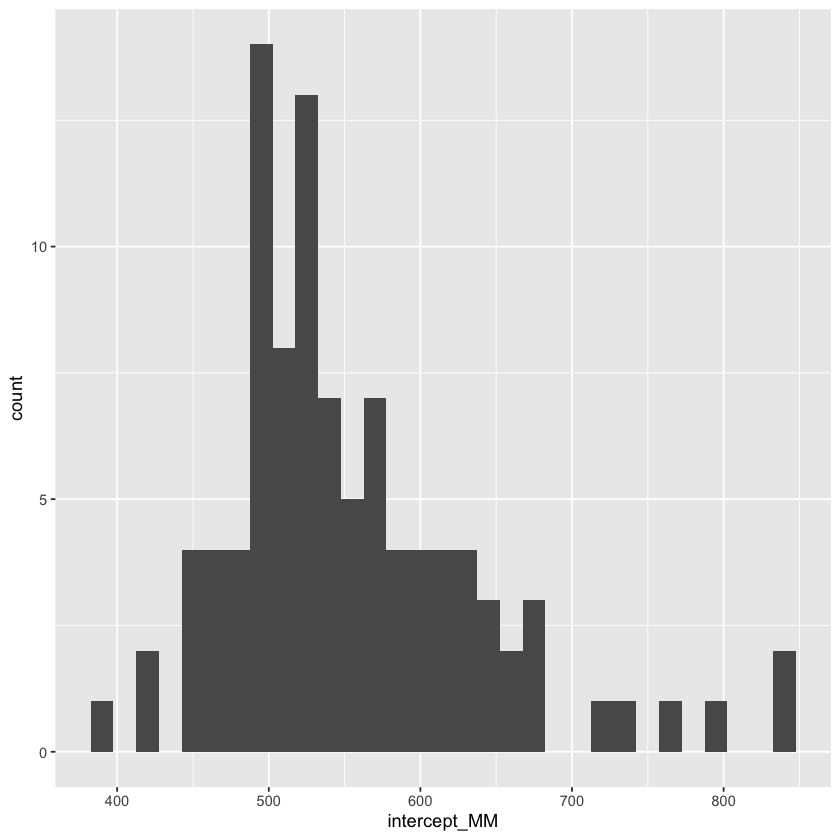

`geom_smooth()` using formula 'y ~ x'



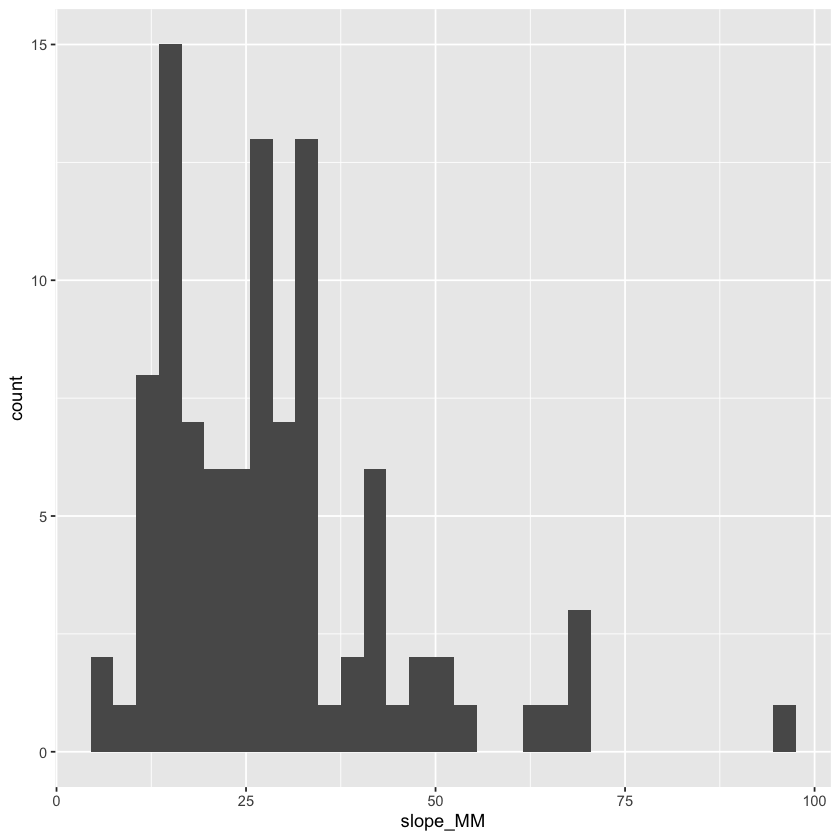

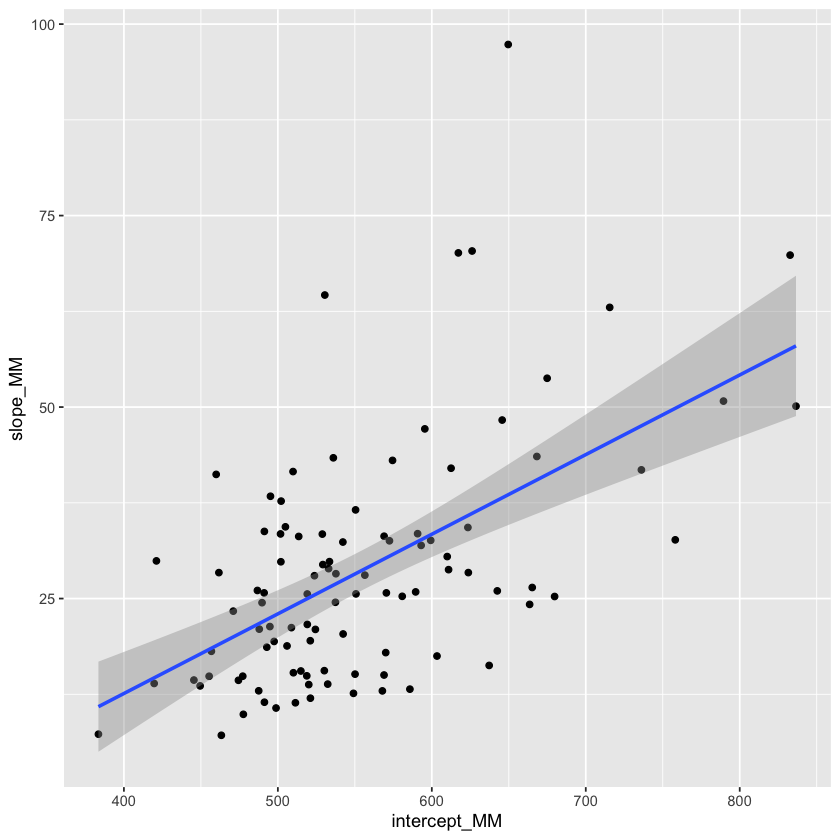

In [23]:
ggplot(data= mixed_lm_coefs, aes(intercept_MM)) + geom_histogram(binwidth = 15) 
ggplot(data= mixed_lm_coefs, aes(slope_MM)) + geom_histogram(binwidth = 3)
ggplot(data= mixed_lm_coefs, aes(x=intercept_MM, y=slope_MM)) + geom_point() + geom_smooth(method=lm)


What differences do you notice relative to the plots for the separately fit regressions? Pay attention to the values on the x-axis for the histograms. Why do you think these differences occur?

I would say the hsitogram for the intercept is similar to the previous one. The histogram for the slopes seems to be a bit closer to a normal distribution, but I still wouldn't call it a normal distribution.

The correaltion visibly increased.

In the next couple of plots, I'm plotting the parameter estimates from the mixed effects model relative to the parameter estimates from the separate by-subject regressions. Each dot is a participant. The black line represents a diagonal on which parameter estimates would be equal in the two models - points under the diagonal have smaller parameter estimates in the mixed-effects model. Points above the diagonal have a larger parameter estimates in the mixed-effects regression relative to the separate by-subject regressions. What are the main patterns you notice in these plots? Can those patterns help you answer the previous question?

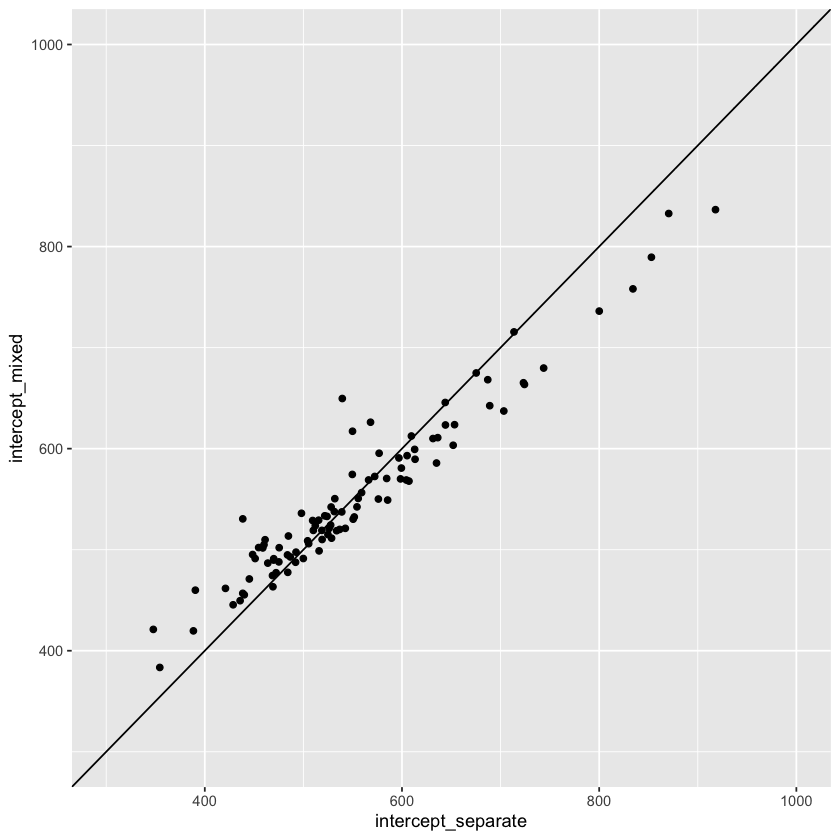

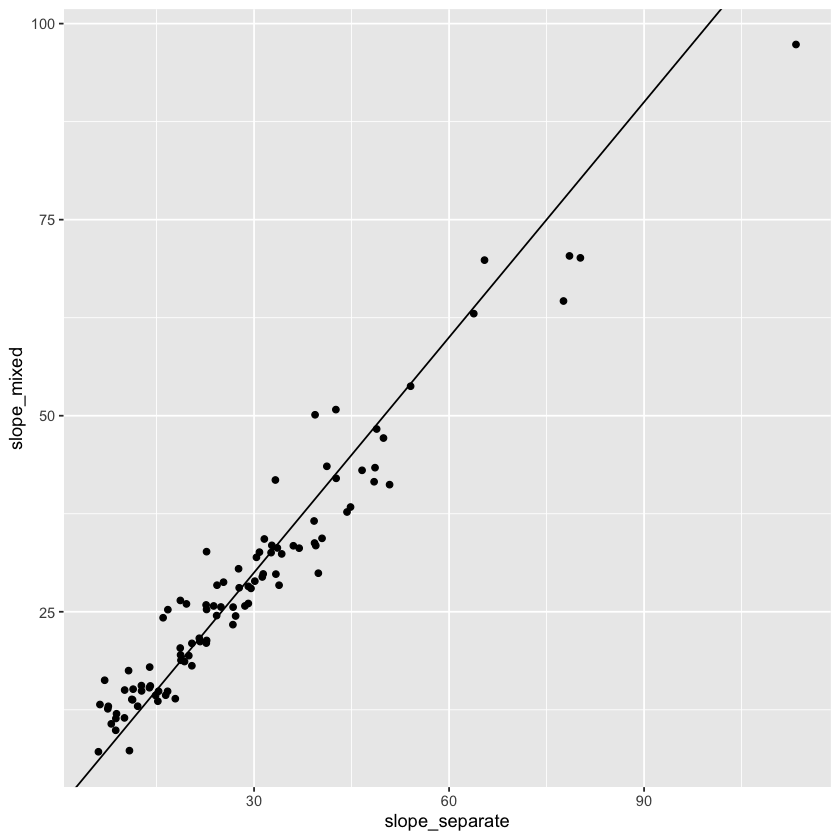

In [24]:
sub_lm_coefs <- arrange(sub_lm_coefs, id)
both_coefs <- bind_cols(sub_lm_coefs, mixed_lm_coefs)
names(both_coefs) <- c('id','intercept_separate','slope_separate', 'intercept_mixed','slope_mixed')

ggplot(both_coefs, aes(intercept_separate, intercept_mixed)) +
    geom_point() +
    geom_abline(intercept=0, slope=1) +
    coord_cartesian(xlim=c(300,1000), ylim=c(300, 1000))


ggplot(both_coefs, aes(slope_separate, slope_mixed)) +
    geom_point() +
    geom_abline(intercept=0, slope=1) 


Higher values of intercept have smaller parameter estimates in the mixed model, while smaller values of intercept have larger parameter estimates in the mixed model.

For slopes the pattern is similar, but less pronounced. Overall for slopes, it seems that the mixed model has a bit more larger parameter estimates than samller.